In [1]:
#https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

In [2]:
import numpy as np
import pandas as pd
import math
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#**Importation des Données**

In [3]:
!gdown --id 1_175L6JzY7Dxgt8R5vRo78n0qeBjni5G

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_175L6JzY7Dxgt8R5vRo78n0qeBjni5G
To: /content/drug_consumption.data
100% 347k/347k [00:00<00:00, 89.1MB/s]


In [4]:
def pd_read_df_raw():
  df_raw =  pd.read_csv('drug_consumption.data', sep=",",header = None)
  return df_raw

#**Traitement des Données**

In [5]:
Liste_maping = []

Age_maping = {
  'Age' : 1 ,
  -0.95197:'18-24',
  -0.07854: '25-34',
  0.49788:'35-44',
  1.09449: '45-54',
  1.82213: '55-64',
  2.59171: '65+',
}
Liste_maping.append(Age_maping)

Gender_maping = {
  'Gender' : 2 ,
  -0.48246:'Male',
  0.48246: 'Female',
}
Liste_maping.append(Gender_maping)

Education_mapping = {
    'Education': 3,
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years',
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years',
    -0.61113: 'Some college or university, no certificate or degree',
    -0.05921: 'Professional certificate/diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree',
}
Liste_maping.append(Education_mapping)

Country_mapping = {
    'Country': 4,
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA',
}
Liste_maping.append(Country_mapping)

Ethnicity_mapping = {
    'Ethnicity': 5,
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White',
}
Liste_maping.append(Ethnicity_mapping)

Nscore_mapping = {
    'Nscore': 6,
    -3.46436: 12, -3.15735: 13, -2.75696: 14, -2.52197: 15, -2.42317: 16,
    -2.34360: 17, -2.21844: 18, -2.05048: 19, -1.86962: 20, -1.69163: 21,
    -1.55078: 22, -1.43907: 23, -1.32828: 24, -1.19430: 25, -1.05308: 26,
    -0.92104: 27, -0.79151: 28, -0.67825: 29, -0.58016: 30, -0.46725: 31,
    -0.34799: 32, -0.24649: 33, -0.14882: 34, -0.05188: 35, 0.04257: 36,
    0.13606: 37, 0.22393: 38, 0.31287: 39, 0.41667: 40, 0.52135: 41,
    0.62967: 42, 0.73545: 43, 0.82562: 44, 0.91093: 45, 1.02119: 46,
    1.13281: 47, 1.23461: 48, 1.37297: 49, 1.49158: 50, 1.60383: 51,
    1.72012: 52, 1.83990: 53, 1.98437: 54, 2.12700: 55, 2.28554: 56,
    2.46262: 57, 2.61139: 58, 2.82196: 59, 3.27393: 60,
}

Liste_maping.append(Nscore_mapping)

Escore_mapping = {
    'Escore': 7,
    -3.27393: 16, -3.00537: 18, -2.72827: 19, -2.53830: 20, -2.44904: 21,
    -2.32338: 22, -2.21069: 23, -2.11437: 24, -2.03972: 25, -1.92173: 26,
    -1.76250: 27, -1.63340: 28, -1.50796: 29, -1.37639: 30, -1.23177: 31,
    -1.09207: 32, -0.94779: 33, -0.80615: 34, -0.69509: 35, -0.57545: 36,
    -0.43999: 37, -0.30033: 38, -0.15487: 39, 0.00332: 40, 0.16767: 41,
    0.32197: 42, 0.47617: 43, 0.63779: 44, 0.80523: 45, 0.96248: 46,
    1.11406: 47, 1.28610: 48, 1.45421: 49, 1.58487: 50, 1.74091: 51,
    1.93886: 52, 2.12700: 53, 2.32338: 54, 2.57309: 55, 2.85950: 56,
    3.00537: 58, 3.27393: 59,
}
Liste_maping.append(Escore_mapping)

Oscore_mapping = {
    'Oscore': 8,
    -3.27393: 24, -2.85950: 26, -2.63199: 28, -2.39883: 29, -2.21069: 30,
    -2.09015: 31, -1.97495: 32, -1.82919: 33, -1.68062: 34, -1.55521: 35,
    -1.42424: 36, -1.27553: 37, -1.11902: 38, -0.97631: 39, -0.84732: 40,
    -0.71727: 41, -0.58331: 42, -0.45174: 43, -0.31776: 44, -0.17779: 45,
    -0.01928: 46, 0.14143: 47, 0.29338: 48, 0.44585: 49, 0.58331: 50,
    0.72330: 51, 0.88309: 52, 1.06238: 53, 1.24033: 54, 1.43533: 55,
    1.65653: 56, 1.88511: 57, 2.15324: 58, 2.44904: 59, 2.90161: 60,
}
Liste_maping.append(Oscore_mapping)

Ascore_mapping = {
    'Ascore': 9,
    -3.46436: 12, -3.15735: 16, -3.00537: 18, -2.90161: 23, -2.78793: 24,
    -2.70172: 25, -2.53830: 26, -2.35413: 27, -2.21844: 28, -2.07848: 29,
    -1.92595: 30, -1.77200: 31, -1.62090: 32, -1.47955: 33, -1.34289: 34,
    -1.21213: 35, -1.07533: 36, -0.91699: 37, -0.76096: 38, -0.60633: 39,
    -0.45321: 40, -0.30172: 41, -0.15487: 42, -0.01729: 43, 0.13136: 44,
    0.28783: 45, 0.43852: 46, 0.59042: 47, 0.76096: 48, 0.94156: 49,
    1.11406: 50, 1.28610: 51, 1.45039: 52, 1.61108: 53, 1.81866: 54,
    2.03972: 55, 2.23427: 56, 2.46262: 57, 2.75696: 58, 3.15735: 59,
    3.46436: 60,
}
Liste_maping.append(Ascore_mapping)

Cscore_mapping = {
    'Cscore': 10,
    -3.46436: 17, -3.15735: 19, -2.90161: 20, -2.72827: 21, -2.57309: 22,
    -2.42317: 23, -2.30408: 24, -2.18109: 25, -2.04506: 26, -1.92173: 27,
    -1.78169: 28, -1.64101: 29, -1.51840: 30, -1.38502: 31, -1.25773: 32,
    -1.13788: 33, -1.01450: 34, -0.89891: 35, -0.78155: 36, -0.65253: 37,
    -0.52745: 38, -0.40581: 39, -0.27607: 40, -0.14277: 41, -0.00665: 42,
    0.12331: 43, 0.25953: 44, 0.41594: 45, 0.58489: 46, 0.7583: 47,
    0.93949: 48, 1.13407: 49, 1.30612: 50, 1.46191: 51, 1.63088: 52,
    1.81175: 53, 2.04506: 54, 2.33337: 55, 2.63199: 56, 3.00537: 57,
    3.46436: 59,
}
Liste_maping.append(Cscore_mapping)

Impulsive_mapping = {
    'Impulsive': 11,
    -2.55524: 'Very Low', -1.37983: 'Low', -0.71126: 'Below Average',
    -0.21712: 'Average', 0.19268: 'Above Average', 0.52975: 'High',
    0.88113: 'Very High', 1.29221: 'Extremely High',
    1.86203: 'Exceptionally High', 2.90161: 'Highest',
}
Liste_maping.append(Impulsive_mapping)

ss_mapping = {
    'SS': 12,
    -2.07848: 'Very Low', -1.54858: 'Low', -1.18084: 'Below Average',
    -0.84637: 'Average', -0.52593: 'Above Average', -0.21575: 'High',
    0.07987: 'Very High', 0.40148: 'Extremely High',
    0.76540: 'Exceptionally High', 1.22470: 'Highest',
    1.92173: 'Off the charts',
}
Liste_maping.append(ss_mapping)


#Special Mapping for the Consumption of drugs
drug_mapping = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
}
column_drug_maping = {
    13: 'Alcohol_consumption',
    14: 'Amphetamines_consumption',
    15: 'Nitrite_consumption',
    16: 'Benzodiazepine_consumption',
    17: 'Caffeine_consumption',
    18: 'Cannabis_consumption',
    19: 'Chocolate_consumption',
    20: 'Cocaine_consumption',
    21: 'Crack consumption',
    22: 'Ecstasy_consumption',
    23: 'Heroin_consumption',
    24: 'Ketamine_consumption',
    25: 'Legalhighs_consumption',
    26: 'LSD_consumption',
    27: 'Methadone_consumption',
    28: 'Mushrooms_consumption',
    29: 'Nicotine_consumption',
    30: 'Semeron_consumption',
    31: 'Volatile_substance_abuse_consumption',

}

In [6]:
def Nettoyage_Donne(df,dico,drug_mapping,column_drug_maping):

  for maping in dico:

    first_key, first_value = next(iter(maping.items()))
    df.rename(columns={first_value: first_key}, inplace=True)
    df[first_key] = df[first_key].map(maping)


  for col_number, col_name in column_drug_maping.items():
    df[col_name] = df[col_number].map(drug_mapping)

  df.drop(columns=list(column_drug_maping.keys()), inplace=True)

  df.drop(columns=0,inplace=True)

  return df

In [19]:
df_netoye = Nettoyage_Donne(pd_read_df_raw(),Liste_maping,drug_mapping,column_drug_maping)
df_netoye.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy_consumption,Heroin_consumption,Ketamine_consumption,Legalhighs_consumption,LSD_consumption,Methadone_consumption,Mushrooms_consumption,Nicotine_consumption,Semeron_consumption,Volatile_substance_abuse_consumption
0,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39,36,42,37,42,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,35-44,Male,Professional certificate/diploma,UK,White,31,45,40,32,34,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,18-24,Female,Masters degree,UK,White,34,34,46,47,46,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


#**Partie Graphique, Etude de cas sur le Canabis**

#Partie Graphique

#Camembert

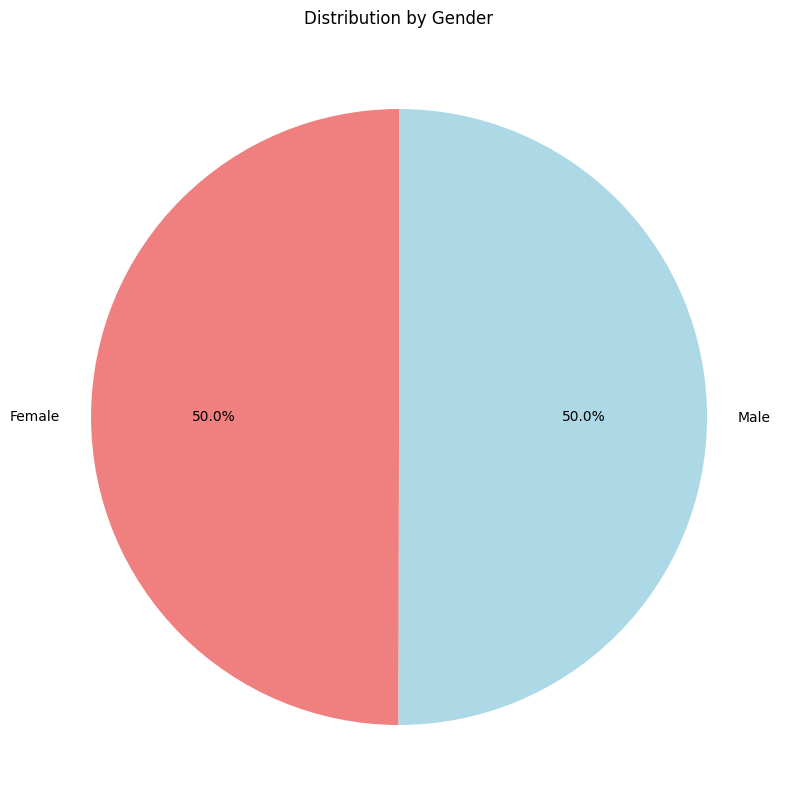

In [8]:
plt.figure(figsize=(10, 10))
plt.pie(df_netoye['Gender'].value_counts().sort_index(), labels=df_netoye['Gender'].value_counts().sort_index().index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribution by Gender')
plt.show()

##Subplots Graphs pour la répartition de notre population

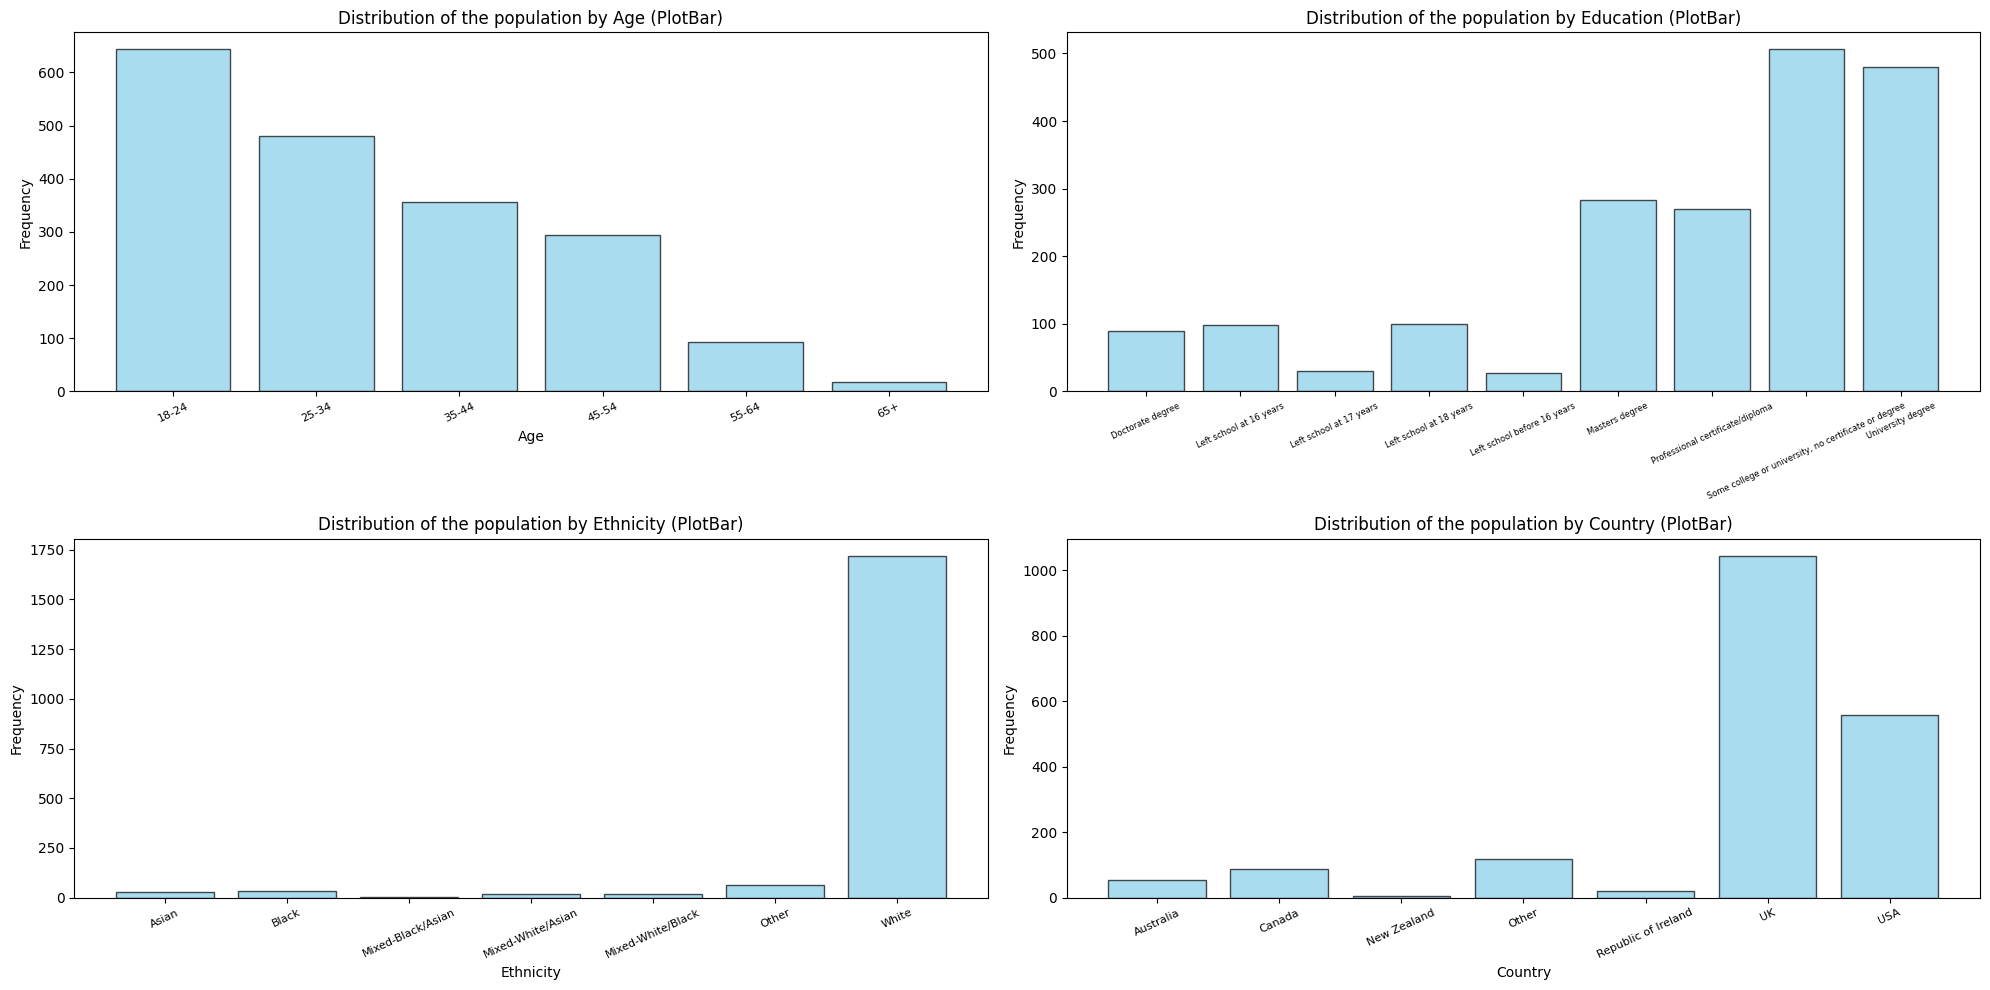

In [9]:
fig , axs = plt.subplots(2,2,figsize = (20,10))

axs[0, 0].bar(df_netoye['Age'].value_counts().sort_index().index, df_netoye['Age'].value_counts().sort_index(), color='skyblue', edgecolor='black', alpha=0.7)

axs[0,0].set_title('Distribution of the population by Age (PlotBar)')
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Frequency')
axs[0,0].tick_params(axis='x', rotation=25,labelsize=8)

axs[1, 0].bar(df_netoye['Ethnicity'].value_counts().sort_index().index, df_netoye['Ethnicity'].value_counts().sort_index(), color='skyblue', edgecolor='black', alpha=0.7)

axs[1,0].set_title('Distribution of the population by Ethnicity (PlotBar)')
axs[1,0].set_xlabel('Ethnicity')
axs[1,0].set_ylabel('Frequency')
axs[1,0].tick_params(axis='x', rotation=25,labelsize=8)

axs[0,1].bar(df_netoye['Education'].value_counts().sort_index().index, df_netoye['Education'].value_counts().sort_index(), color='skyblue', edgecolor='black', alpha=0.7)

axs[0,1].set_title('Distribution of the population by Education (PlotBar)')
axs[0,1].set_ylabel('Frequency')
axs[0,1].tick_params(axis='x', rotation=25,labelsize=6)

axs[1,1].bar(df_netoye['Country'].value_counts().sort_index().index, df_netoye['Country'].value_counts().sort_index(), color='skyblue', edgecolor='black', alpha=0.7)

axs[1,1].set_title('Distribution of the population by Country (PlotBar)')
axs[1,1].set_xlabel('Country')
axs[1,1].set_ylabel('Frequency')
axs[1,1].tick_params(axis='x', rotation=25,labelsize=8)


fig.tight_layout()
fig.show()

##Etude canabis

#**Modelisation**

#Matrice de corelation pour un premiere aperçue

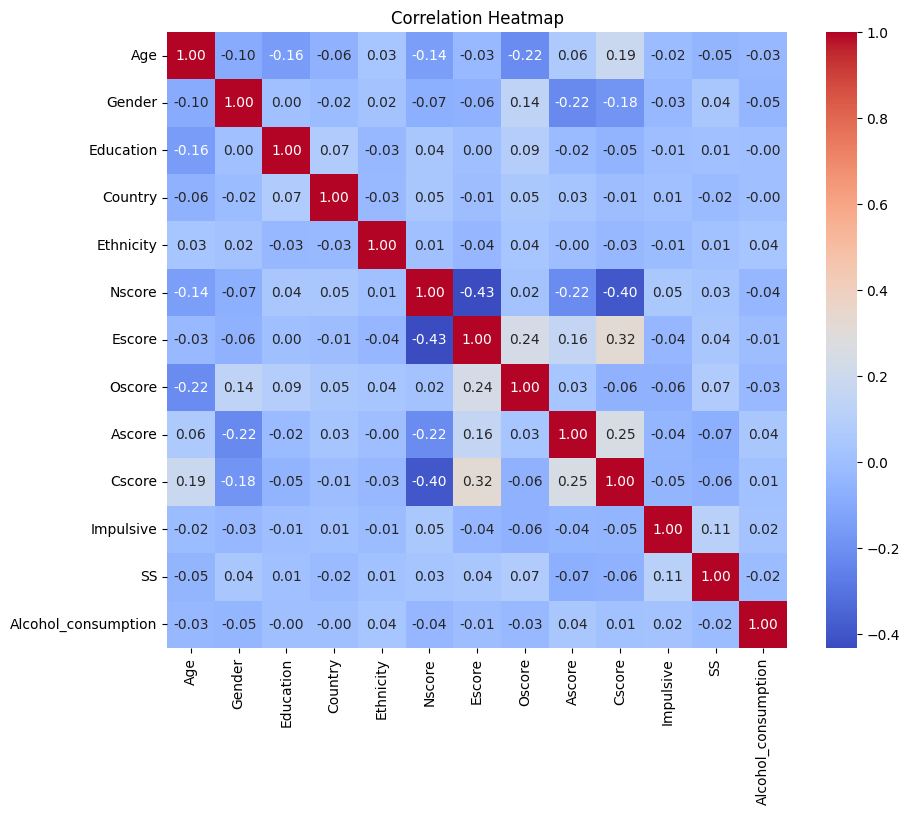

In [10]:
plt.figure(figsize=(10, 8))

df_matrix = df_netoye

categorical_cols = df_matrix.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_matrix[col] = label_encoder.fit_transform(df_matrix[col])

sns.heatmap(df_matrix.drop(columns=[
    'Amphetamines_consumption',
    'Nitrite_consumption',
    'Benzodiazepine_consumption',
    'Caffeine_consumption',
    'Cannabis_consumption',
    'Chocolate_consumption',
    'Cocaine_consumption',
    'Crack consumption',
    'Ecstasy_consumption',
    'Heroin_consumption',
    'Ketamine_consumption',
    'Legalhighs_consumption',
    'LSD_consumption',
    'Methadone_consumption',
    'Mushrooms_consumption',
    'Nicotine_consumption',
    'Semeron_consumption',
    'Volatile_substance_abuse_consumption',]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

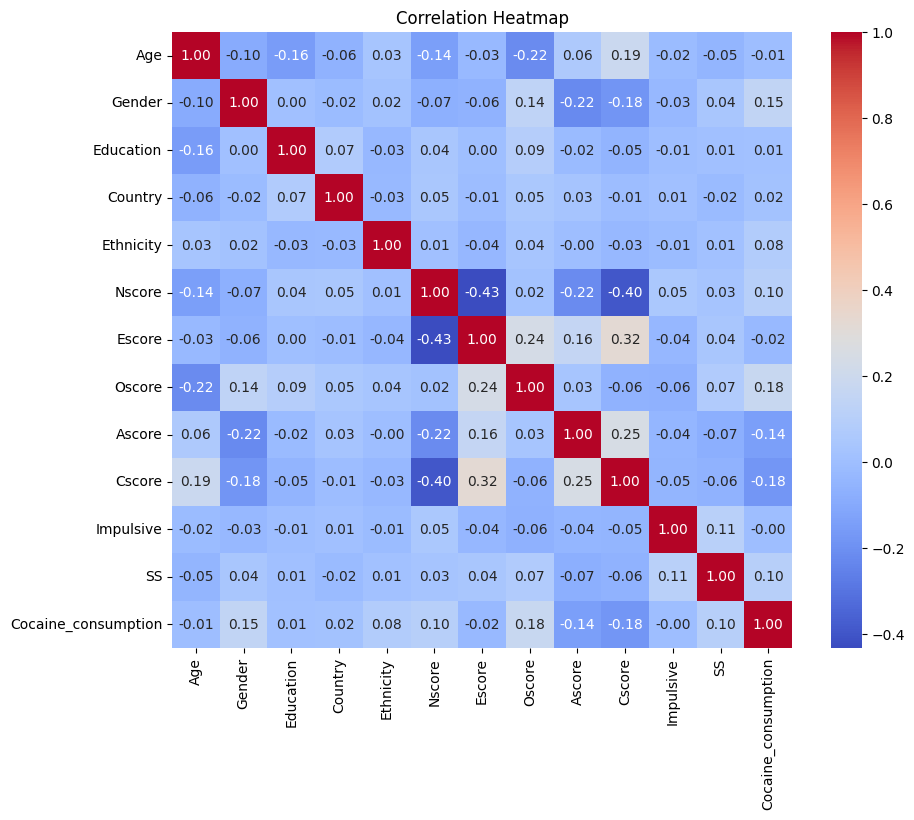

In [11]:
plt.figure(figsize=(10, 8))

df_matrix = df_netoye

categorical_cols = df_matrix.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_matrix[col] = label_encoder.fit_transform(df_matrix[col])

sns.heatmap(df_matrix.drop(columns=[
    'Alcohol_consumption',
    'Amphetamines_consumption',
    'Nitrite_consumption',
    'Benzodiazepine_consumption',
    'Caffeine_consumption',
    'Cannabis_consumption',
    'Chocolate_consumption',
    'Crack consumption',
    'Ecstasy_consumption',
    'Heroin_consumption',
    'Ketamine_consumption',
    'Legalhighs_consumption',
    'LSD_consumption',
    'Methadone_consumption',
    'Mushrooms_consumption',
    'Nicotine_consumption',
    'Semeron_consumption',
    'Volatile_substance_abuse_consumption',]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Encodage des variables et drop des colones

In [12]:
def Label_encode(df,list_columns_encode,list_columns_to_drop):
  le = LabelEncoder()

  for column in list_columns_encode:
    df[column] = le.fit_transform(df[column])
  if list_columns_to_drop is not None:
    for column in list_columns_to_drop:
      df= df.drop(columns=column)

  return df

#Split train and test

In [13]:
def split_train_test(df,target):
  X = df.drop(target, axis=1)
  y = df[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)
  return X_train ,X_test ,y_train ,y_test

#Modelisation

In [14]:
def Modelisation(X_train ,X_test ,y_train ,y_test,type):
  #Random Forest
  rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
  rf_model = RandomForestClassifier()
  rf_grid = GridSearchCV(rf_model, rf_params, cv=3)
  rf_grid.fit(X_train, y_train)
  rf_best_model = rf_grid.best_estimator_
  rf_pred = rf_best_model.predict(X_test)
  rf_accuracy = accuracy_score(y_test, rf_pred)

  #SVM
  svm_params = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
  svm_model = SVC()
  svm_grid = GridSearchCV(svm_model, svm_params, cv=3)
  svm_grid.fit(X_train, y_train)
  svm_best_model = svm_grid.best_estimator_
  svm_pred = svm_best_model.predict(X_test)
  svm_accuracy = accuracy_score(y_test, svm_pred)

  #KNN
  knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
  knn_model = KNeighborsClassifier()
  knn_grid = GridSearchCV(knn_model, knn_params, cv=3)
  knn_grid.fit(X_train, y_train)
  knn_best_model = knn_grid.best_estimator_
  knn_pred = knn_best_model.predict(X_test)
  knn_accuracy = accuracy_score(y_test, knn_pred)

  if type == 'Accuracy':
    return {'Random_Forest':rf_accuracy,'SVM':svm_accuracy,'KNN':knn_accuracy}

  if type == 'RocCurve':

    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    plt.title("Roc Curve of differents models")
    rfc_disp = RocCurveDisplay.from_estimator(rf_best_model, X_test, y_test, ax=ax, alpha=0.8)
    svm_disp = RocCurveDisplay.from_estimator(svm_best_model, X_test, y_test, ax=ax, alpha=0.8)
    knn_disp = RocCurveDisplay.from_estimator(knn_best_model, X_test, y_test, ax=ax, alpha=0.8)


#Graphique de Métriques Accuracy

In [15]:
def Graphique_Accuracy(dico):
  data = list(dico.values())
  labels = list(dico.keys())

  plt.bar(labels, data, color=['blue', 'green', 'red'])
  plt.xlabel('Algorithms')
  plt.ylabel('Accuracy')
  plt.title('Accuracy of Classification Algorithms')
  plt.show()

#Cocaine Accuracy

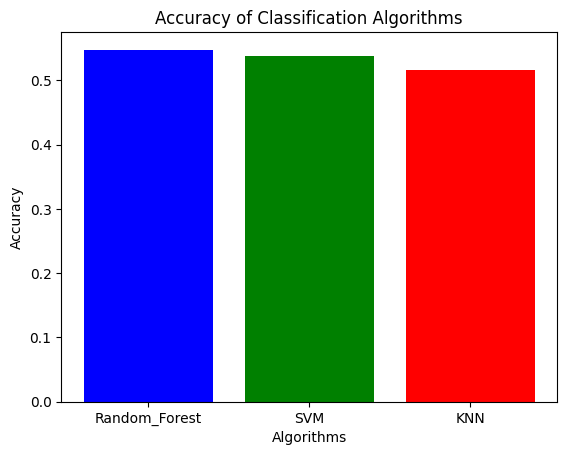

In [16]:
df_encode = Label_encode(df_netoye,list_columns_encode=['Age','Gender','Education','Country','Ethnicity','Impulsive','SS'],list_columns_to_drop=[
    'Alcohol_consumption',
    'Amphetamines_consumption',
    'Nitrite_consumption',
    'Benzodiazepine_consumption',
    'Caffeine_consumption',
    'Cannabis_consumption',
    'Chocolate_consumption',
    'Crack consumption',
    'Ecstasy_consumption',
    'Heroin_consumption',
    'Ketamine_consumption',
    'Legalhighs_consumption',
    'LSD_consumption',
    'Methadone_consumption',
    'Mushrooms_consumption',
    'Nicotine_consumption',
    'Semeron_consumption',
    'Volatile_substance_abuse_consumption',
])
X_train, X_test, y_train, y_test = split_train_test(df_encode,'Cocaine_consumption')
Accuracy = Modelisation(X_train, X_test, y_train, y_test , type='Accuracy')
Graphique_Accuracy(Accuracy)

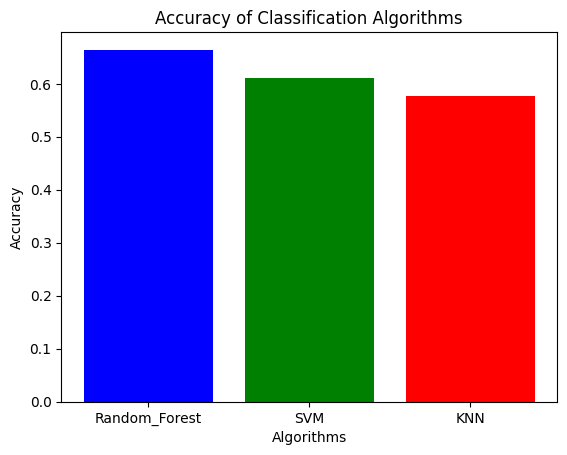

In [17]:
df_encode = Label_encode(df_netoye,list_columns_encode=[
    'Age',
    'Gender',
    'Education',
    'Country',
    'Ethnicity',
    'Impulsive',
    'SS',
    'Alcohol_consumption',
    'Amphetamines_consumption',
    'Nitrite_consumption',
    'Benzodiazepine_consumption',
    'Caffeine_consumption',
    'Cannabis_consumption',
    'Chocolate_consumption',
    'Crack consumption',
    'Ecstasy_consumption',
    'Heroin_consumption',
    'Ketamine_consumption',
    'Legalhighs_consumption',
    'LSD_consumption',
    'Methadone_consumption',
    'Mushrooms_consumption',
    'Nicotine_consumption',
    'Semeron_consumption',
    'Volatile_substance_abuse_consumption',
],list_columns_to_drop=None)
X_train, X_test, y_train, y_test = split_train_test(df_encode,'Cocaine_consumption')
Accuracy2 = Modelisation(X_train, X_test, y_train, y_test,type='Accuracy')
Graphique_Accuracy(Accuracy2)

#Canabis en binaire , Ceux qui ont utilisé sur la derniere année ou moins et ceux qui ont utilisé le dernier mois ou plus

#Roc Curve

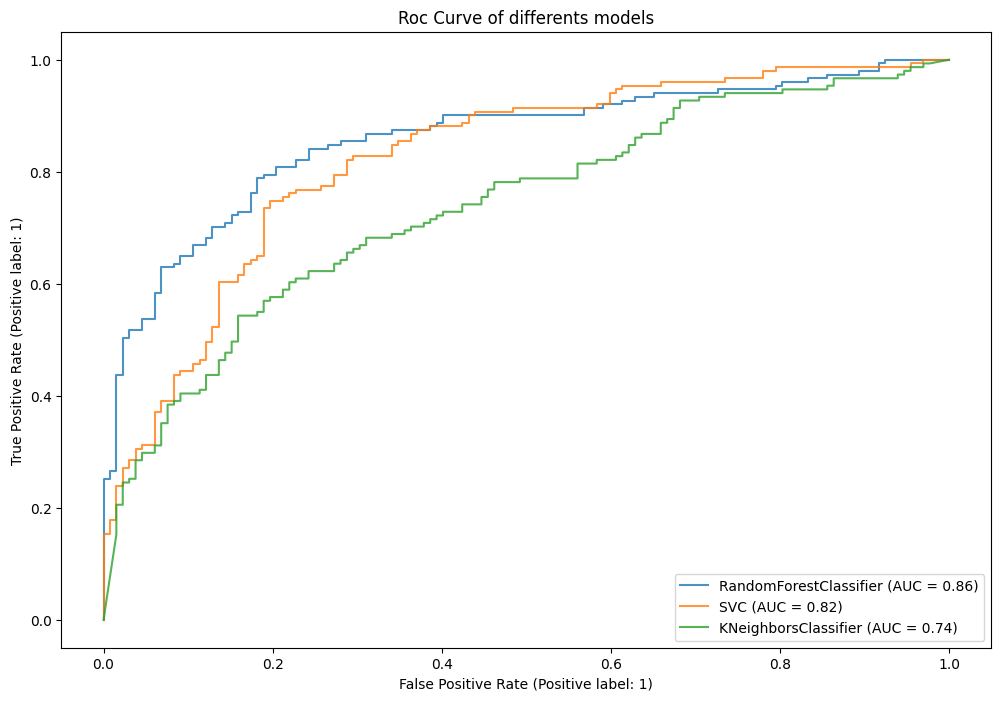

In [20]:
df_netoye['Cannabis_target'] = ((df_netoye['Cannabis_consumption'] == 'Never Used')
                              | (df_netoye['Cannabis_consumption'] == 'Used over a Decade Ago')
                              | (df_netoye['Cannabis_consumption'] == 'Used in Last Decade')
                              | (df_netoye['Cannabis_consumption'] == 'Used in Last Year')).astype(int)

df_encode = Label_encode(df_netoye,list_columns_encode=['Age','Gender','Education','Country','Ethnicity','Impulsive','SS'],list_columns_to_drop=[
    'Alcohol_consumption',
    'Amphetamines_consumption',
    'Nitrite_consumption',
    'Benzodiazepine_consumption',
    'Caffeine_consumption',
    'Cannabis_consumption',
    'Chocolate_consumption',
    'Cocaine_consumption',
    'Crack consumption',
    'Ecstasy_consumption',
    'Heroin_consumption',
    'Ketamine_consumption',
    'Legalhighs_consumption',
    'LSD_consumption',
    'Methadone_consumption',
    'Mushrooms_consumption',
    'Nicotine_consumption',
    'Semeron_consumption',
    'Volatile_substance_abuse_consumption',
])
X_train, X_test, y_train, y_test = split_train_test(df_encode,'Cannabis_target')
Modelisation(X_train, X_test, y_train, y_test,type='RocCurve')